In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A=pd.read_table('HR.txt',index_col=0)

In [29]:
A.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
A_gender=A.groupby('Gender')
A1=A_gender.get_group(1)   #Male
A2=A_gender.get_group(2)   #Female

In [4]:
#unpaired t-Test
g1=A1['MonthlyIncome']
g2=A2['MonthlyIncome']

In [17]:
type(g1)

pandas.core.series.Series

In [18]:
#Check for Normality
shapiro(g2)

(0.8416616916656494, 9.378564564919968e-24)

In [19]:
#Both groups are not normal
bartlett(g1,g2)


BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

In [20]:
u_stat,p_val=mannwhitneyu(g1,g2)
print(p_val)

0.044208341633010594


In [7]:
n1=len(g1)
n2=len(g2)


588

In [8]:
n2/n1

0.6666666666666666

In [10]:
d=(np.mean(g1) - np.mean(g2)) / np.sqrt(((n1-1)*np.var(g1)+(n2-1)*np.var(g2)) / n1+n2-2)
d

-0.05043216946192664

In [11]:
ttest_power(d, nobs=n1+n2, alpha=0.05, alternative='two-sided')

0.4890284454879567

In [30]:
#unpaired t-Test
G1=A1['Age']
G2=A2['Age']

In [32]:
shapiro(G2)

(0.9777933955192566, 8.791240446726079e-08)

In [33]:
#Both groups are not normal
bartlett(g1,g2)


BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

In [35]:
u_stat,p_val=mannwhitneyu(G1,G2)
print(p_val)
#since p-val >0.05, it fails to reject H0, implies => Avg age of Male Employee almost same as Avg age of female employee

0.08331979343883855


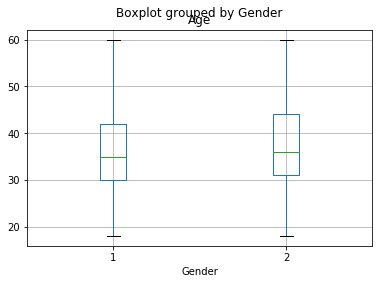

In [38]:
A.boxplot(column='Age',by='Gender')

In [39]:
G1.describe()

count    882.000000
mean      36.653061
std        9.042329
min       18.000000
25%       30.000000
50%       35.000000
75%       42.000000
max       60.000000
Name: Age, dtype: float64

In [40]:
G2.describe()

count    588.000000
mean      37.329932
std        9.266083
min       18.000000
25%       31.000000
50%       36.000000
75%       44.000000
max       60.000000
Name: Age, dtype: float64